In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist

In [2]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

In [5]:
type(X_train[1])

numpy.ndarray

In [6]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [7]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [8]:
y_train = to_categorical(Y_train, 10)
y_test = to_categorical(Y_test, 10)

In [9]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3,3), activation="relu", input_shape = (28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64, kernel_size=(3,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

c:\Users\dhruv\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test))


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.9096 - loss: 0.2852 - val_accuracy: 0.9850 - val_loss: 0.0470
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9861 - loss: 0.0450 - val_accuracy: 0.9896 - val_loss: 0.0328
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9918 - loss: 0.0283 - val_accuracy: 0.9869 - val_loss: 0.0410
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.9935 - loss: 0.0206 - val_accuracy: 0.9917 - val_loss: 0.0255
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9961 - loss: 0.0130 - val_accuracy: 0.9925 - val_loss: 0.0248


In [11]:
# Evaluate the model on the test data
loss, accuracy = model.evaluate(X_test, y_test)

# Print the accuracy
print(f'Test Accuracy: {accuracy * 100:.2f}%')


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9894 - loss: 0.0329
Test Accuracy: 99.25%


In [12]:
import numpy as np
import matplotlib.pyplot as plt

def display_function(n):
    fig, axes = plt.subplots(1, n, figsize=(10, 2))

    for i in range(n):
        test_image = X_test[i]
        test_image_input = np.expand_dims(test_image, axis=0)
        predicted_probabilities = model.predict(test_image_input)
        predicted_label = np.argmax(predicted_probabilities)
        
        axes[i].imshow(test_image.squeeze(), cmap='gray')
        axes[i].set_title(f'Pred: {predicted_label}')
        axes[i].axis('off')




1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


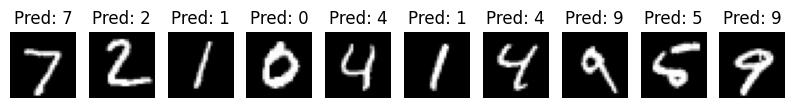

In [13]:
display_function(10)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


(-0.5, 27.5, 27.5, -0.5)

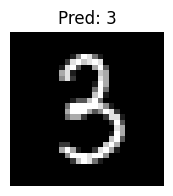

In [19]:
i = 310
fig, axes = plt.subplots(1, 1, figsize=(10, 2))
test_image = X_test[i]
test_image_input = np.expand_dims(test_image, axis=0)
predicted_probabilities = model.predict(test_image_input)
predicted_label = np.argmax(predicted_probabilities)
axes.imshow(test_image.squeeze(), cmap='gray')
axes.set_title(f'Pred: {predicted_label}')
axes.axis('off')